<a href="https://colab.research.google.com/github/sushanth0963/My-porfolio/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


In [ ]:
data = pd.read_csv("creditcard.csv")

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# New Section

In [ ]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(25838, 31)
               Time            V1            V2            V3            V4  \
count  25838.000000  25838.000000  25838.000000  25837.000000  25837.000000   
mean   19376.128532     -0.225653      0.166976      0.723131      0.229368   
std    11653.899424      1.889055      1.552796      1.684909      1.434242   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     7694.750000     -0.951266     -0.405158      0.279675     -0.683788   
50%    22684.000000     -0.267973      0.176509      0.862364      0.204882   
75%    30231.500000      1.166499      0.818206      1.489349      1.109950   
max    33787.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  25837.000000  25837.000000  25837.000000  25837.000000  25837.000000   
mean      -0.194354      0.079800     -0.128669      0.026060      0.441922   
std        1.436206      1.323018      

In [ ]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0034176084508136238
Fraud Cases: 88
Valid Transactions: 25749


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,88.000000
mean,100.010000
std,265.845031
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,25749.000000
mean,75.726227
std,219.488324
min,0.000000
25%,6.200000
50%,18.960000
75%,67.500000
max,7879.420000


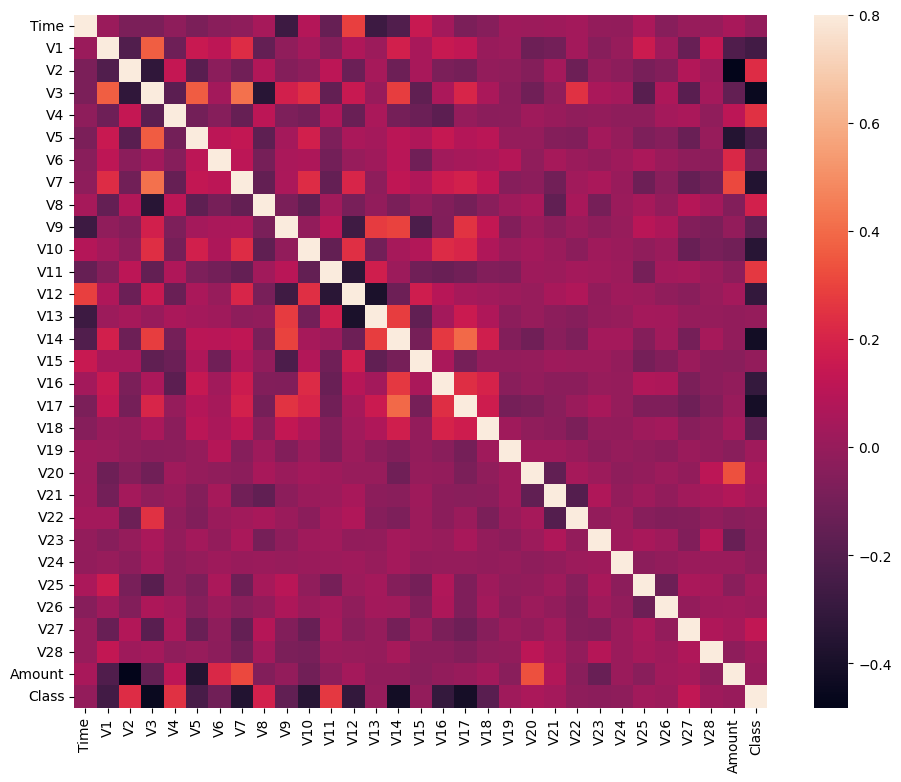

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(25838, 30)
(25838,)


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

ValueError: ('Lengths must match to compare', (56962,), (5168,))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assuming yTest and yPred are your actual and predicted labels, respectively

# Verify the lengths of yTest and yPred
print(f"Length of yTest: {len(yTest)}")
print(f"Length of yPred: {len(yPred)}")

if len(yTest) != len(yPred):
    raise ValueError("The lengths of yTest and yPred do not match. Please check your data.")

# Number of outliers and errors
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()

print("The model used is Random Forest classifier")

# Evaluate the classifier
acc = accuracy_score(yTest, yPred)
print(f"The accuracy is {acc}")

prec = precision_score(yTest, yPred)
print(f"The precision is {prec}")

rec = recall_score(yTest, yPred)
print(f"The recall is {rec}")

f1 = f1_score(yTest, yPred)
print(f"The F1-Score is {f1}")

MCC = matthews_corrcoef(yTest, yPred)
print(f"The Matthews correlation coefficient is {MCC}")


Length of yTest: 56962
Length of yPred: 5168


ValueError: The lengths of yTest and yPred do not match. Please check your data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assuming Xtrain, Xtest, ytrain, ytest are your training and testing datasets
# Assuming classifier is your trained model

# Verify the shapes of the data
print(f"Shape of Xtrain: {Xtrain.shape}")
print(f"Shape of Xtest: {Xtest.shape}")
print(f"Shape of ytrain: {ytrain.shape}")
print(f"Shape of ytest: {ytest.shape}")

# Make predictions
yPred = classifier.predict(Xtest)

# Verify the lengths of yTest and yPred
print(f"Length of yTest: {len(ytest)}")
print(f"Length of yPred: {len(yPred)}")

if len(ytest) != len(yPred):
    raise ValueError("The lengths of yTest and yPred do not match. Please check your data.")

# Number of outliers and errors
n_outliers = len(fraud)
n_errors = (yPred != ytest).sum()

print("The model used is Random Forest classifier")

# Evaluate the classifier
acc = accuracy_score(ytest, yPred)
print(f"The accuracy is {acc}")

prec = precision_score(ytest, yPred)
print(f"The precision is {prec}")

rec = recall_score(ytest, yPred)
print(f"The recall is {rec}")

f1 = f1_score(ytest, yPred)
print(f"The F1-Score is {f1}")

MCC = matthews_corrcoef(ytest, yPred)
print(f"The Matthews correlation coefficient is {MCC}")


NameError: name 'Xtrain' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assuming xTrain, xTest, yTrain, yTest are your training and testing datasets
# Assuming RandomForestClassifier is your trained model

# Verify the shapes of the data
print(f"Shape of xTrain: {xTrain.shape}") # Changed Xtrain to xTrain
print(f"Shape of xTest: {xTest.shape}")  # Changed Xtest to xTest
print(f"Shape of yTrain: {yTrain.shape}") # Changed ytrain to yTrain
print(f"Shape of yTest: {yTest.shape}")  # Changed ytest to yTest

# Make predictions
yPred = classifier.predict(xTest) # Changed Xtest to xTest


# Verify the lengths of yTest and yPred
print(f"Length of yTest: {len(yTest)}") # Changed ytest to yTest
print(f"Length of yPred: {len(yPred)}")

if len(yTest) != len(yPred): # Changed ytest to yTest
    raise ValueError("The lengths of yTest and yPred do not match. Please check your data.")

# Number of outliers and errors
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum() # Changed ytest to yTest

print("The model used is Random Forest classifier")

# Evaluate the classifier
acc = accuracy_score(yTest, yPred) # Changed ytest to yTest
print(f"The accuracy is {acc}")

prec = precision_score(yTest, yPred) # Changed ytest to yTest
print(f"The precision is {prec}")

rec = recall_score(yTest, yPred) # Changed ytest to yTest
print(f"The recall is {rec}")

f1 = f1_score(yTest, yPred) # Changed ytest to yTest
print(f"The F1-Score is {f1}")

MCC = matthews_corrcoef(yTest, yPred) # Changed ytest to yTest
print(f"The Matthews correlation coefficient is {MCC}")

Shape of xTrain: (227845, 30)
Shape of xTest: (56962, 30)
Shape of yTrain: (227845,)
Shape of yTest: (56962,)


NameError: name 'classifier' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# Assuming xTrain, xTest, yTrain, yTest are your training and testing datasets
# Assuming RandomForestClassifier is your trained model

# Verify the shapes of the data
print(f"Shape of xTrain: {xTrain.shape}") # Changed Xtrain to xTrain
print(f"Shape of xTest: {xTest.shape}")  # Changed Xtest

Shape of xTrain: (227845, 30)
Shape of xTest: (56962, 30)


In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [56962, 5168]

In [ ]:
# printing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion

ImportError: cannot import name 'confusion' from 'sklearn.metrics' (/usr/local/lib/python3.11/dist-packages/sklearn/metrics/__init__.py)

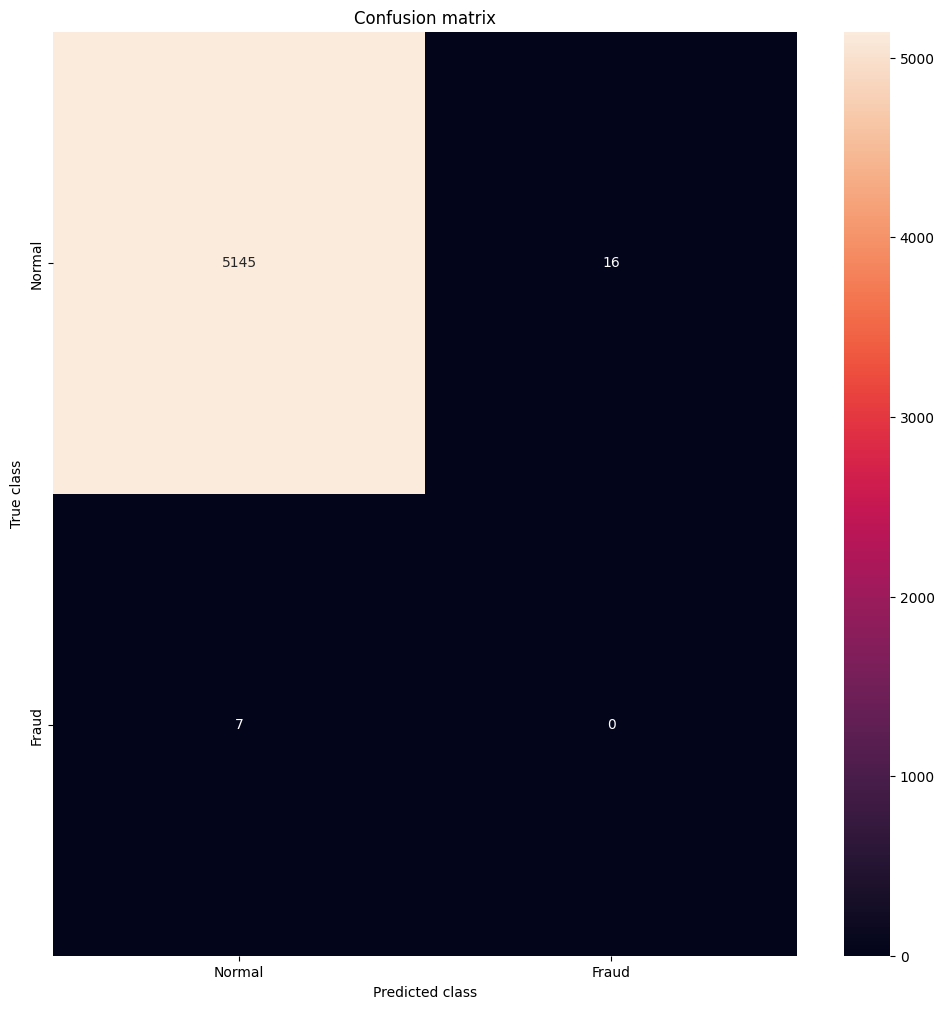

In [ ]:
# printing the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']

# Ensure yTest and yPred have the same length
yTest = yTest[:len(yPred)]  # Adjust yTest to match yPred's length or vice-versa

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()